# **Spark GraphX**

**GraphX** is a library or a collection of algorithms and tools for manipulating graphs (e.g., social network graphs, routes and connection points, or network topology graphs) and performing parallel graph operations and computations. In other words,  GraphX extends the RDD API to include operations for manipulating graphs, creating subgraphs, or accessing all vertices in a path.


## **Graphs**

In general, graphs can be represented by the letter **G** which consists of two sets, **V** and **E**, where **V is a set of vertices**, and **E is a set of edges**. Each one of the edges is a tuple (I am assuming that you know what a tuple is) descending from the a of vertices V. 

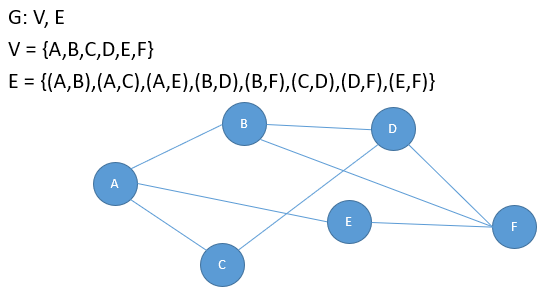


**N.B**

**A vertex is the most basic part of a graph and it is also called a node.**

**An edge is a point that connects two vertices.**


## **Types of graphs**

There are different types of graphs but we are only considering **Directed Graphs** and **Weighted Graphs**

*   **A directed graph** is a set of ordered pair of vertices that are connected together, where all the edges are directed from one vertex to another (One way). A directed graph is sometimes called a **digraph** or a **directed network**. In contrast, a graph where the edges are bidirectional is called an **undirected graph**.

  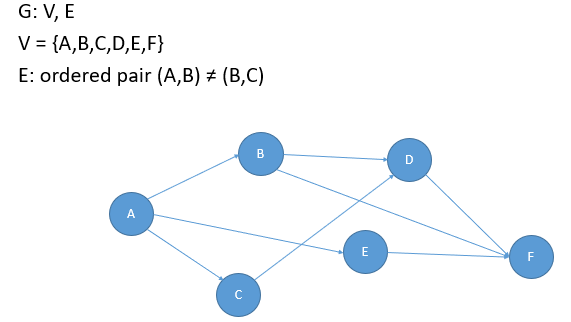

*   **A Weighted Graph** is a graph with weighted edges. The weights may represent factors like cost or the distance required to travel between nodes.

  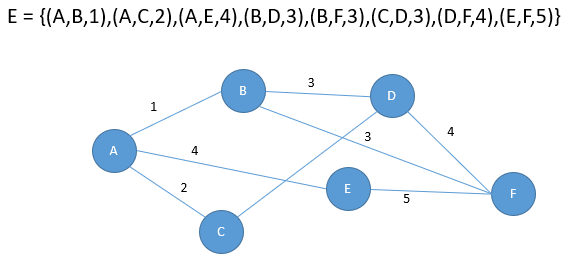



## **Degree of Vertices**

The simplest way to define the degree of vertices is that it is the number of edges pointing to or coming from a vertex V. for example, vertex A below has 3 edges pointing to it or coming from it, this means that vertex A has a degree of 3. 

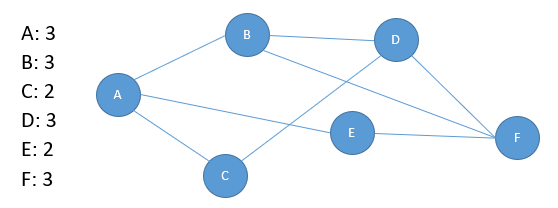

Degree of vertices can be separated into **In-Degrees** and **Out-Degrees**. In-degree of a vertex is the number of edges pointing or coming into the vertex. Using the previously shown graph (shown below), vertex A has an out-degree of 3, which means that there are 3 edges coming from it, and an in-degree of 0, meaning that there is not a single edge coming in or pointing towards it. 

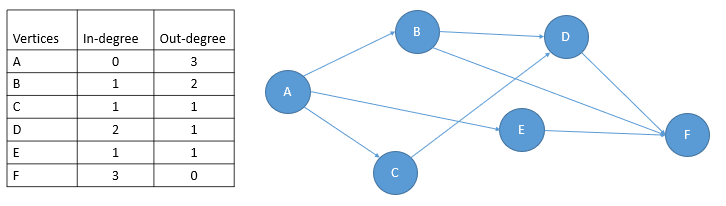

## **Graphs Representation**

Graphs may be represented using **Adjacency List** or **Adjacency Matrix**.

* An **Adjacency list** is an array consisting of the address of all the linked lists. The first node of the linked list represents the vertex and the remaining lists connected to this node represents the vertices to which this node is connected. This representation can also be used to represent a weighted graph. The linked list can slightly be changed to even store the weight of the edge.

  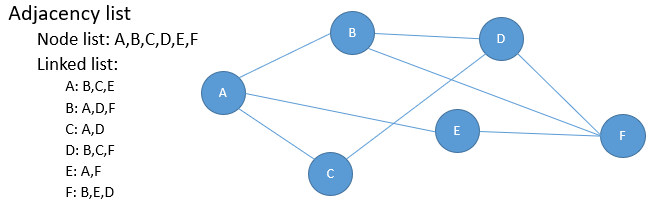

*  **An Adjacency Matrix** is a 2D array of size V x V where V is the number of vertices in a graph. Let the 2D array be adj[][], a slot adj[i][j] = 1 indicates that there is an edge from vertex i to vertex j. Adjacency Matrix is also used to represent weighted graphs. If adj[i][j] = w, then there is an edge from vertex i to vertex j with weight w.

  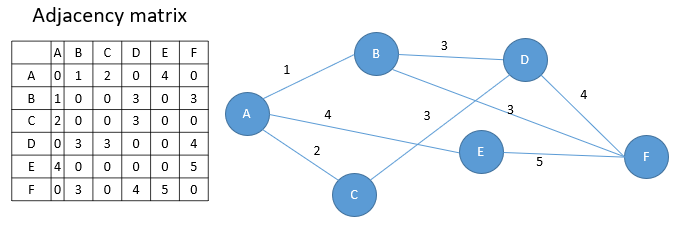


# **Application**

## **Prerequisites**

**Remembert that we have to always include step one, two, and three of last week's lecture. Why? Because we are using the free version of Google Colab.**

In [1]:
#Step 1: Install Dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

#Step 2: Add environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.0-bin-hadoop3"
os.environ["HADOOP_HOME"] = os.environ["SPARK_HOME"]

#these are new enviromental variables
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"
#Step 3: Initialize Pyspark
import findspark
findspark.init()

In [2]:
#creating spark context
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

## **Graphframes**

In [4]:
#creating vertices
vertices = spark.createDataFrame([
				                          ('A', 350), 
                                  ('B', 360),
                                  ('C', 195),
                                  ('D', 90),
                                  ('E', 90),
                                  ('F', 215),
                                  ('G', 30),
                                  ('H', 25),
                                  ('I', 25),
                                  ('J', 20),
				   ],['id', 'total_seconds'])

In [5]:
#Creating edges
edges = spark.createDataFrame([
				('A','B',60),
				('B','A',50),
				('A','C',50),
				('C','A',100),
				('A','D',90),
				('C','I',25),	
				('C','J',20),
				('B','F',50),
				('F','B',110),
				('F','G',30),
				('F','H',25),
				('B','E',90)
			     ],['src', 'dst', 'relationship'])


In [6]:
from graphframes import *
g = GraphFrame(vertices, edges)

spark-3.3.0-bin-hadoop3/python/pyspark/sql/dataframe.py:149: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  "DataFrame.sql_ctx is an internal property, and will be removed "


In [7]:
g.degrees.show()

spark-3.3.0-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+------+
| id|degree|
+---+------+
|  B|     5|
|  D|     1|
|  C|     4|
|  A|     5|
|  I|     1|
|  F|     4|
|  E|     1|
|  J|     1|
|  G|     1|
|  H|     1|
+---+------+



In [8]:
g.vertices.show()


+---+-------------+
| id|total_seconds|
+---+-------------+
|  A|          350|
|  B|          360|
|  C|          195|
|  D|           90|
|  E|           90|
|  F|          215|
|  G|           30|
|  H|           25|
|  I|           25|
|  J|           20|
+---+-------------+



In [9]:
g.edges.show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  A|  B|          60|
|  B|  A|          50|
|  A|  C|          50|
|  C|  A|         100|
|  A|  D|          90|
|  C|  I|          25|
|  C|  J|          20|
|  B|  F|          50|
|  F|  B|         110|
|  F|  G|          30|
|  F|  H|          25|
|  B|  E|          90|
+---+---+------------+



In [10]:
g.shortestPaths(landmarks=["A", "J"]).show()

+---+-------------+----------------+
| id|total_seconds|       distances|
+---+-------------+----------------+
|  F|          215|{A -> 2, J -> 4}|
|  E|           90|              {}|
|  B|          360|{A -> 1, J -> 3}|
|  D|           90|              {}|
|  C|          195|{A -> 1, J -> 1}|
|  J|           20|        {J -> 0}|
|  A|          350|{A -> 0, J -> 2}|
|  G|           30|              {}|
|  I|           25|              {}|
|  H|           25|              {}|
+---+-------------+----------------+



In [11]:
results = g.shortestPaths(landmarks=["A", "J"])
results.select("id", "distances").show()

+---+----------------+
| id|       distances|
+---+----------------+
|  F|{A -> 2, J -> 4}|
|  E|              {}|
|  B|{A -> 1, J -> 3}|
|  D|              {}|
|  C|{A -> 1, J -> 1}|
|  J|        {J -> 0}|
|  A|{A -> 0, J -> 2}|
|  G|              {}|
|  I|              {}|
|  H|              {}|
+---+----------------+



The shortest path is going from: C|{A -> 1, J -> 1}|

A goes to C then C to J, with distance relationships 50 and 20, so 70, with Clair's total talking time in seconds also being the shortest at 195 seconds out of the options of paths. 

In [12]:
g.inDegrees.show()
g.outDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  B|       2|
|  D|       1|
|  C|       1|
|  A|       2|
|  I|       1|
|  F|       1|
|  E|       1|
|  J|       1|
|  G|       1|
|  H|       1|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  B|        3|
|  C|        3|
|  A|        3|
|  F|        3|
+---+---------+

